In [1]:
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [9]:
def extract_features(image_path, label=None):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error loading image: {image_path}")
        return None 

    # Preprocessing: Konversi ke grayscale dan normalisasi
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)  

    # GLCM dengan parameter yang disesuaikan
    distances = [1, 3] 
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    glcm = graycomatrix(gray, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)
    dissimilarity = graycoprops(glcm, 'dissimilarity').mean()
    correlation = graycoprops(glcm, 'correlation').mean()
    ASM = graycoprops(glcm, 'ASM').mean()
    energy = graycoprops(glcm, 'energy').mean()
    
    features = [image_path, dissimilarity, correlation, ASM, energy]
    if label:
        features.append(label)
    return features

In [10]:
columns = ['File', 'dissimilarity', 'correlation', 'ASM', 'energy', 'Class']
df_features = pd.DataFrame(columns=columns)

labels = ['apple', 'banana', 'orange']
for label in labels:
    for i in range(1, 1501): 
        file_name = f'dataset11/{label}{i}.png'
        features = extract_features(file_name, label)
        if features is not None:
            df_features.loc[len(df_features)] = features

print(df_features)

                          File  dissimilarity  correlation       ASM  \
0         dataset11/apple1.png       8.112765     0.950329  0.082165   
1         dataset11/apple2.png       8.419720     0.948120  0.070538   
2         dataset11/apple3.png       6.831740     0.971540  0.075909   
3         dataset11/apple4.png       6.672623     0.971487  0.077774   
4         dataset11/apple5.png       6.257372     0.972379  0.069206   
...                        ...            ...          ...       ...   
4495  dataset11/orange1496.png       5.632957     0.989698  0.011445   
4496  dataset11/orange1497.png       3.662777     0.994106  0.012900   
4497  dataset11/orange1498.png       8.416085     0.973593  0.126034   
4498  dataset11/orange1499.png       7.123152     0.982813  0.091376   
4499  dataset11/orange1500.png       5.831196     0.988005  0.115611   

        energy   Class  
0     0.286515   apple  
1     0.265437   apple  
2     0.275484   apple  
3     0.278844   apple  
4     0.26

In [11]:
X = df_features[['dissimilarity', 'correlation', 'ASM', 'energy']]
y = df_features['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=3, cv=5)
grid.fit(X_train, y_train)

print("Best parameters found: ", grid.best_params_)
print("Best estimator found: ", grid.best_estimator_)

predictions = grid.predict(X_test)
train_predictions = grid.best_estimator_.predict(X_train)

test_accuracy = accuracy_score(y_test, predictions)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Akurasi pada data train: {:.2f}%".format(train_accuracy * 100))
print("Akurasi pada data test: {:.2f}%".format(test_accuracy * 100))

print(classification_report(y_test, predictions))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.826 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.814 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.819 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.811 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.804 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.797 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.793 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.782 total time=   0.0s
[CV 5/5] END max_dep

In [17]:
from sklearn.model_selection import GridSearchCV

# Konfigurasi GridSearchCV dengan f1-score sebagai metrik
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='f1_weighted', refit=True, verbose=3, cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.829 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.819 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.812 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.814 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.801 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.797 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.792 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.795 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.780 total time=   0.0s
[CV 5/5] END max_dep

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_weighted', verbose=3)

In [14]:
from joblib import dump

# Menyimpan model terbaik
best_model = grid.best_estimator_
dump(best_model, 'best_model.pkl')
print("Model dengan F1-score terbaik telah disimpan sebagai 'best_model.pkl'")

Model dengan F1-score terbaik telah disimpan sebagai 'best_model.pkl'


Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.832 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.822 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.818 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.815 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.814 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.796 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.801 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.790 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.779 total time=   0.0s
[CV 5/5] END max_dep

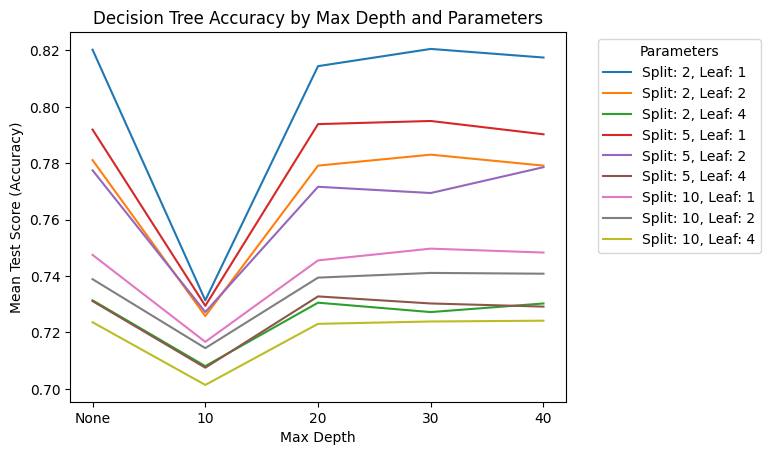

In [21]:
import matplotlib.pyplot as plt

# Menjalankan GridSearchCV
grid.fit(X_train, y_train)

# Mengumpulkan hasil GridSearchCV
results = pd.DataFrame(grid.cv_results_)

# Memilih kolom yang relevan
results = results[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']]

# Mengubah tipe data kolom parameter agar lebih mudah diplot
results['param_max_depth'] = results['param_max_depth'].astype(str)
results['param_min_samples_split'] = results['param_min_samples_split'].astype(str)
results['param_min_samples_leaf'] = results['param_min_samples_leaf'].astype(str)

# Membuat plot untuk setiap kombinasi min_samples_split dan min_samples_leaf
for split in results['param_min_samples_split'].unique():
    for leaf in results['param_min_samples_leaf'].unique():
        subset = results[(results['param_min_samples_split'] == split) & (results['param_min_samples_leaf'] == leaf)]
        plt.plot(subset['param_max_depth'], subset['mean_test_score'], label=f'Split: {split}, Leaf: {leaf}')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score (Accuracy)')
plt.title('Decision Tree Accuracy by Max Depth and Parameters')
plt.legend(title='Parameters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

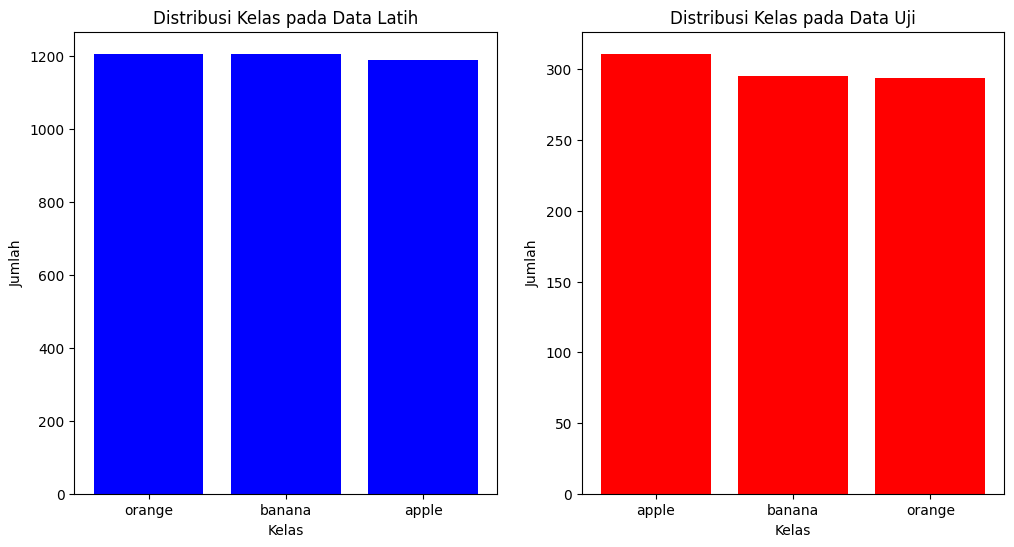

In [5]:
import matplotlib.pyplot as plt

# Menghitung jumlah tiap kelas di data latih dan data uji
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Visualisasi distribusi kelas di data latih
ax[0].bar(train_counts.index, train_counts.values, color='b')
ax[0].set_title('Distribusi Kelas pada Data Latih')
ax[0].set_xlabel('Kelas')
ax[0].set_ylabel('Jumlah')

# Visualisasi distribusi kelas di data uji
ax[1].bar(test_counts.index, test_counts.values, color='r')
ax[1].set_title('Distribusi Kelas pada Data Uji')
ax[1].set_xlabel('Kelas')
ax[1].set_ylabel('Jumlah')

plt.show()